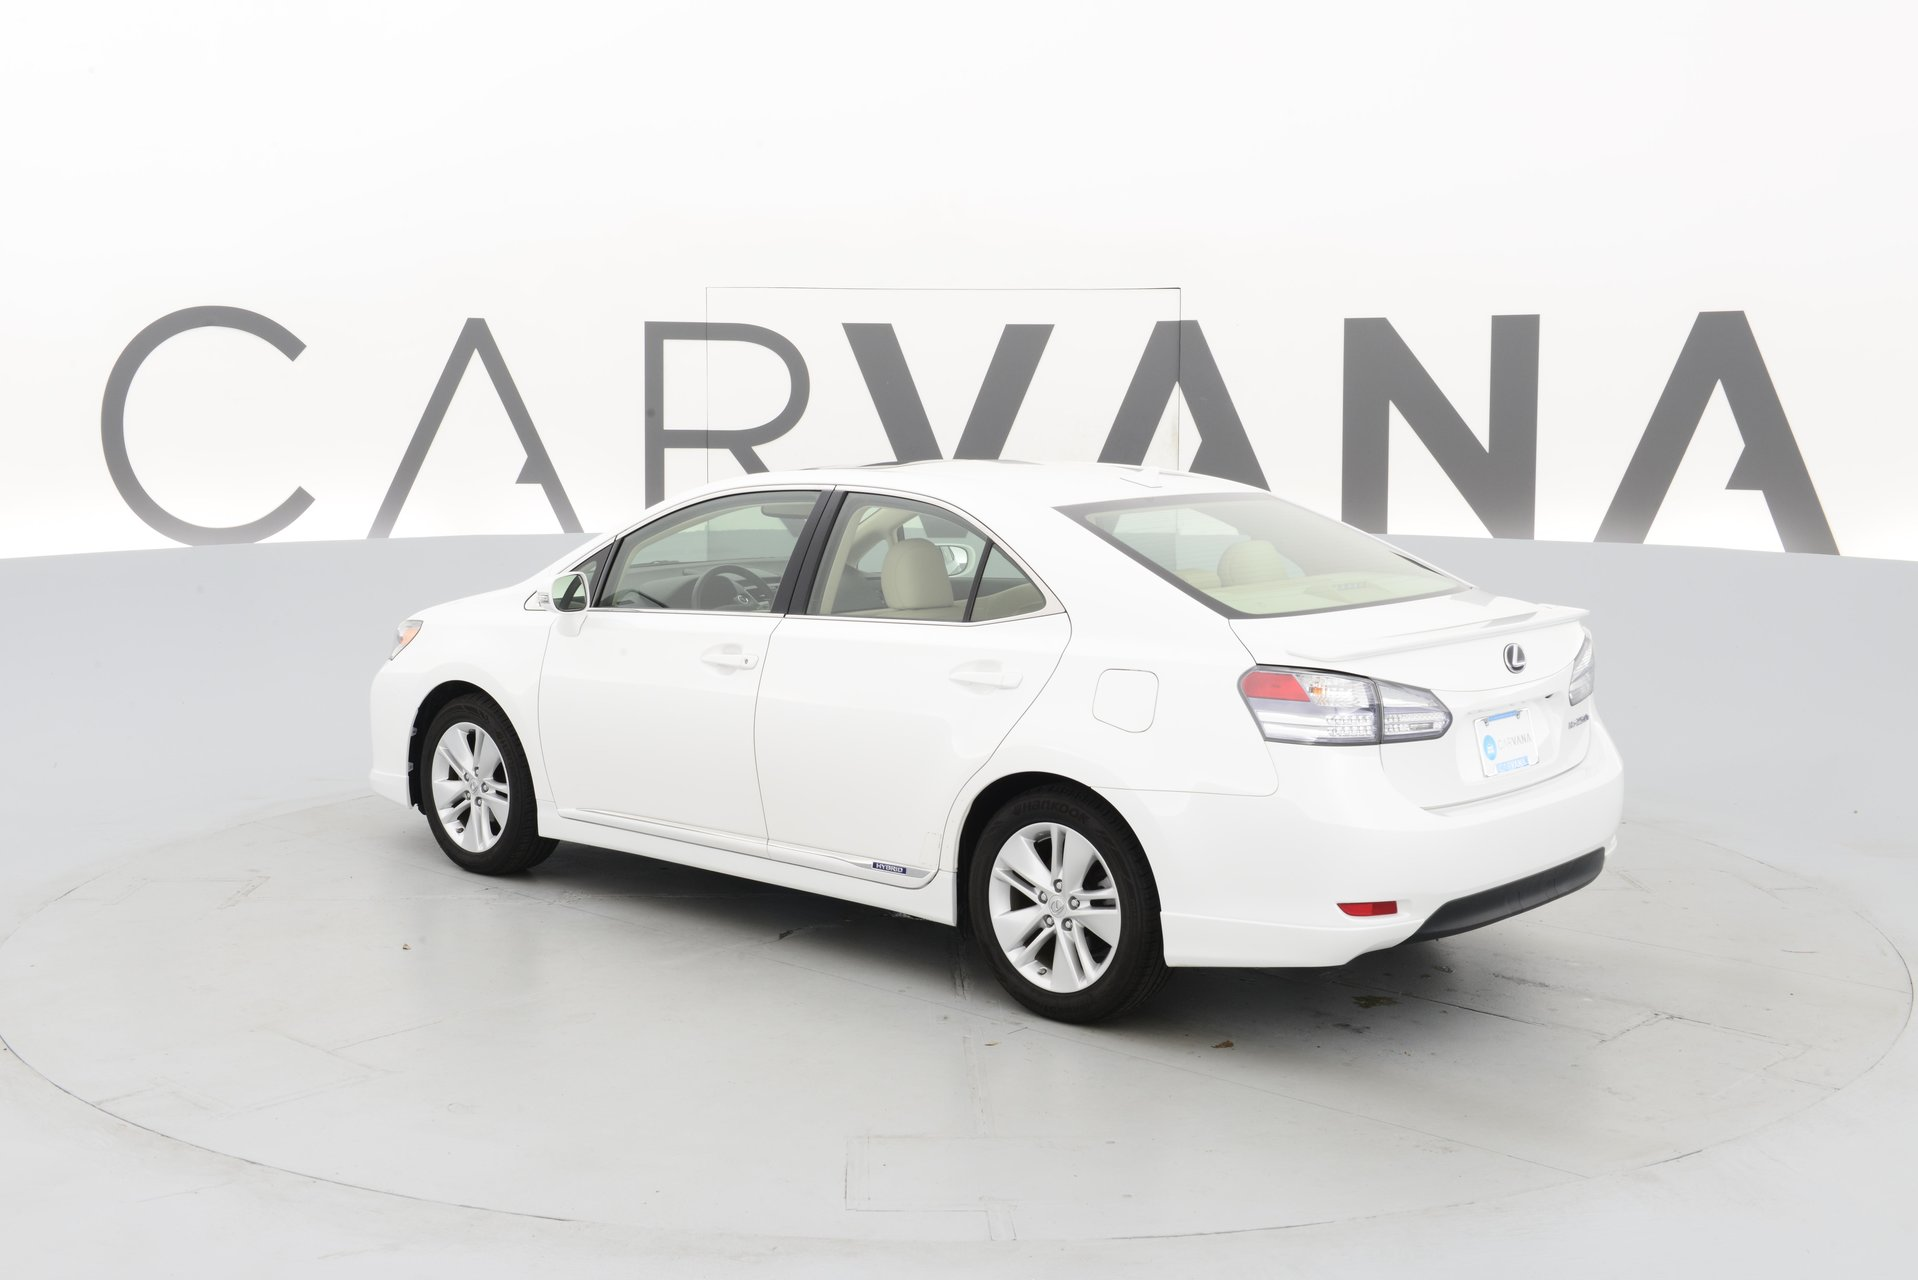

In [ ]:
from unet.dataset import CarvanaDataset

dataset = CarvanaDataset(root="/home/mukesh/.cache/kagglehub/datasets/ipythonx/carvana-image-masking-png/versions/1", split="train")
img, mask = dataset.__getitem__(0)

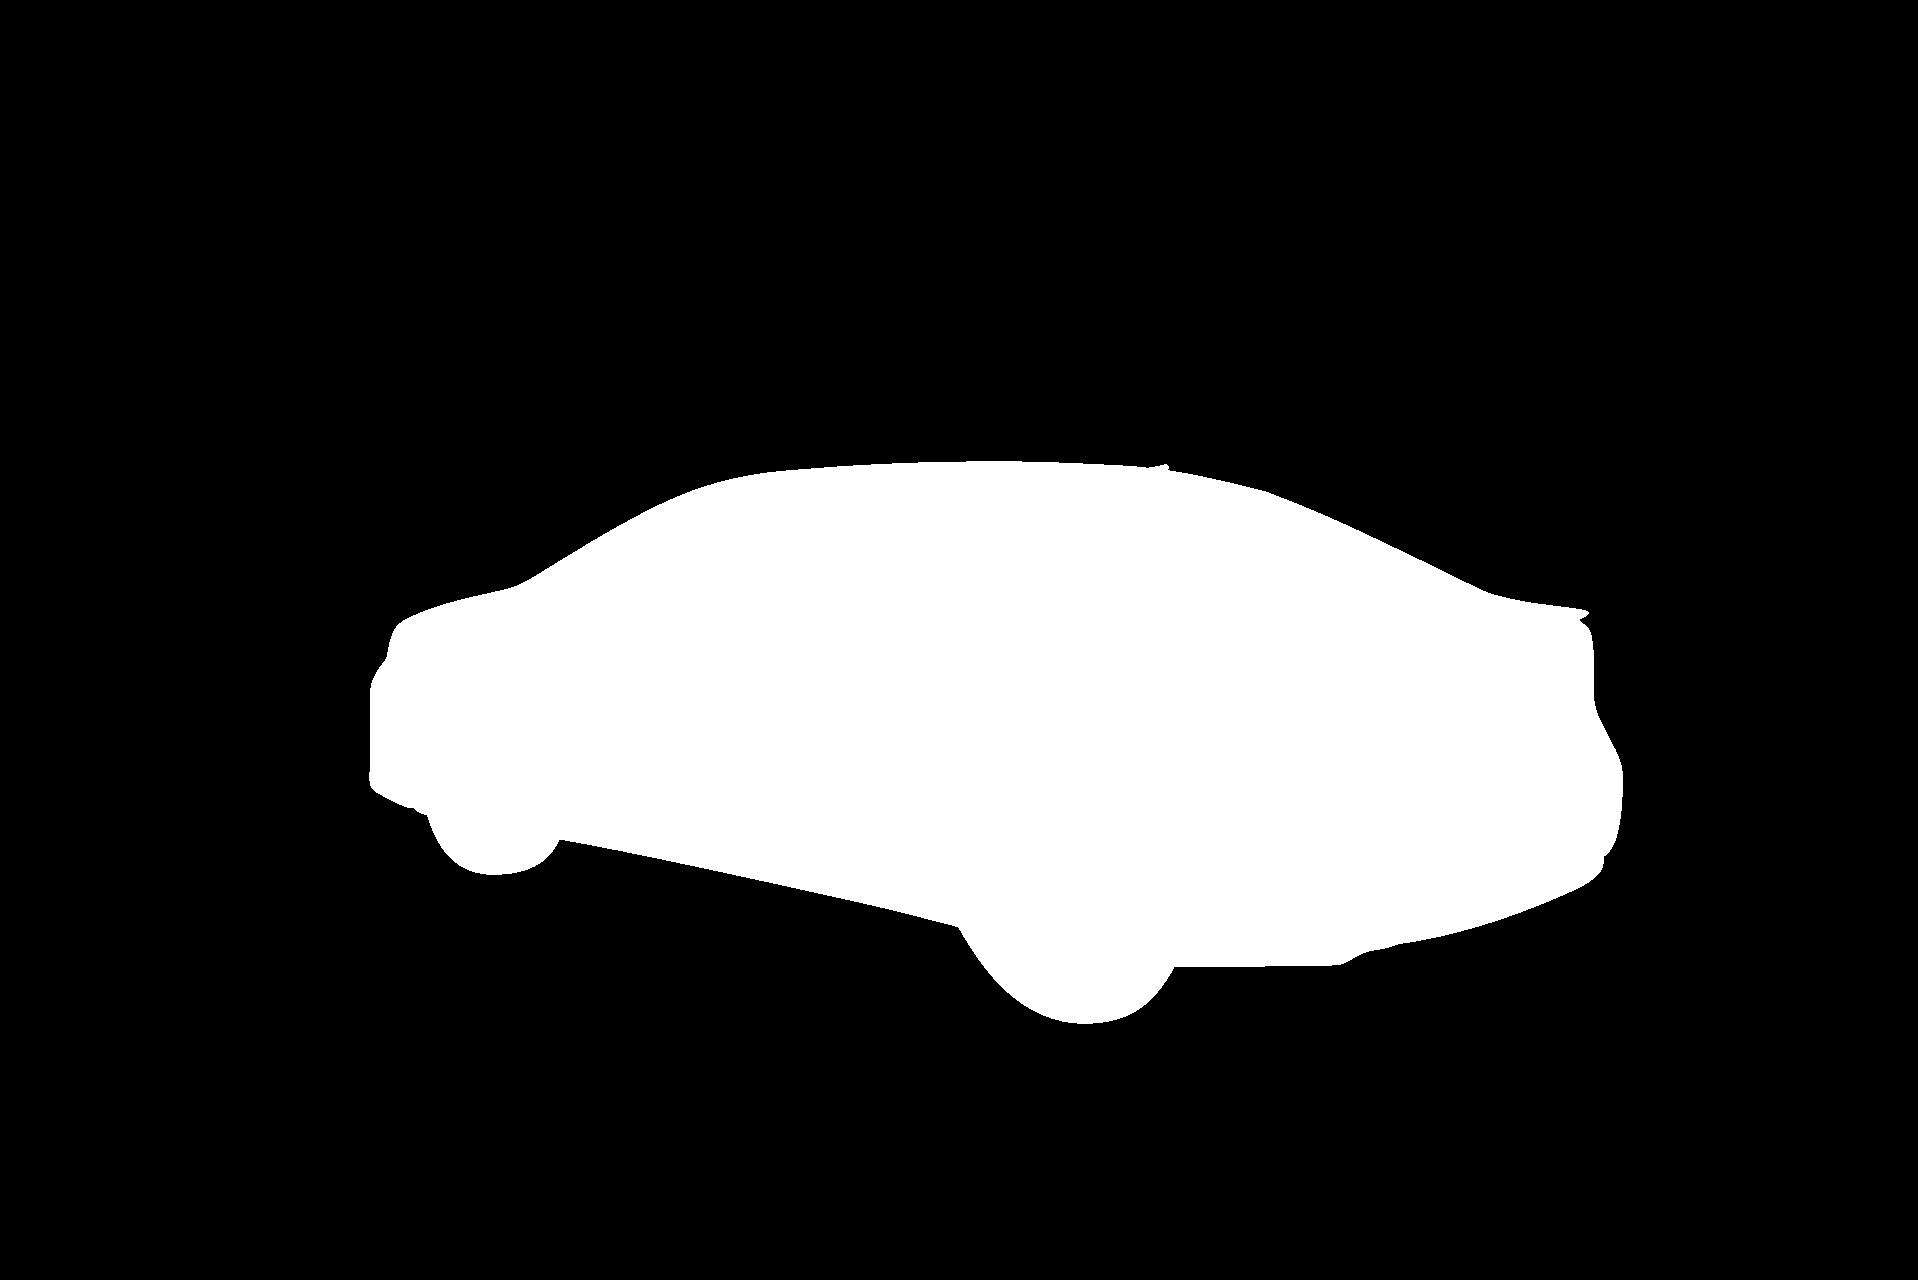

In [5]:
mask